# Analyze NFL Stats with Python
This project demonstrates taking statistics from NFL teams (Pro Football Reference) and creates a machine learning model. The model looks at certain team statistics from past games and determines which stats are most significant in the wins and losses. Next, the model runs a logistic regression to predict whether a team won or lost their game in comparison to the actual outcome. Any of the 32 teams can be plugged in to predict their season win/loss ratio at about 90 percent accuracy.

## Setup and inspection
First, we import and load all of our libraries.

In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the dataset
Next we load the dataset stored as our "season_2021.csv" and save it as "nfl

<details>
    <summary style="display:list-item;"><b>Toggle for an overview of the variables in our dataset.</b></summary>

* `symbol`: team name abbreviation
* `team_name`: team name
* `result`: whether this team won (`W`), lost (`L`), or tied (`T`) for this game
* `1stD_offense`: First down conversions by the team's offense
* `TotYd_offense`: Total yards gained by the team's offense
* `PassY_offense`: Total passing yards gained by the team's offense
* `RushY_offense`: Total rushing yards gained by the team's offense
* `TO_offense`: Turnovers committed by the team's offense
* `1stD_defense`: First down conversions allowed by the team's defense
* `TotYd_defense`: Total yards allowed by the team's defense
* `PassY_defense`: Total passing yards allowed by the team's defense
* `RushY_defense`: Total rushing yards allowed by the team's defense
* `TO_defense`: Turnovers in favor of the defensive team

</details>

In [42]:
# load dataset
nfl = pd.read_csv('season_2021.csv')

# inspect first few rows
nfl.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,Arizona Cardinals,1,Sun,September 12,W,Tennessee Titans,38,13,22,416,280,136,1,17,248,162,86,3
1,Arizona Cardinals,2,Sun,September 19,W,Minnesota Vikings,34,33,21,474,371,103,2,22,419,242,177,0
2,Arizona Cardinals,3,Sun,September 26,W,Jacksonville Jaguars,31,19,23,407,316,91,1,20,361,202,159,4
3,Arizona Cardinals,4,Sun,October 3,W,Los Angeles Rams,37,20,27,465,249,216,0,24,401,280,121,2
4,Arizona Cardinals,5,Sun,October 10,W,San Francisco 49ers,17,10,20,304,210,94,1,19,338,186,152,1


###  Summarize outcomes

Next we count the results to see the win/loss/tie values in the data.  This refers to all teams who participated in the games and groups them by how many won (W), lost (L), or tied (T). We have a total of 285 games, but only 284 teams won.

In [43]:
# check result value counts
nfl['result'].value_counts()

L    284
W    284
T      2
Name: result, dtype: int64

###  Encode the result labels

Since we have a small group who tied, it might cause issues in the model and its performance. To solve this we will change the results to numeric values and group losses with ties to allow our regression algorithm to properly function.

In [44]:
# nested dictionary to encode alphanumeric values to numeric values
result_encoder = {'result': {'W': 1, 'T': 0, 'L': 0}}

# encode result column using encoder
nfl.replace(result_encoder, inplace=True)

# check result value counts
nfl['result'].value_counts()

0    286
1    284
Name: result, dtype: int64

###  Visualize the stats
We can explore trends in the stats to predict wins. This example sets our variable 'stat' to '1stD_offense'.  We will plug this stat into a boxplot to visualize the trends in wins and losses per stat. Any stat can be plugged into the 'stat' variable to analyze.

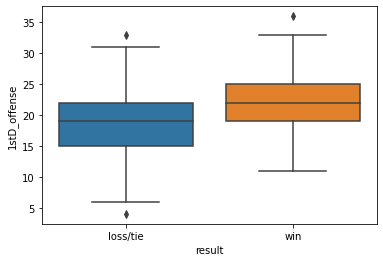

Index(['1stD_offense', 'TotYd_offense', 'PassY_offense', 'RushY_offense',
       'TO_offense', '1stD_defense', 'TotYd_defense', 'PassY_defense',
       'RushY_defense', 'TO_defense'],
      dtype='object')


In [45]:
# change stat to view plot
stat = '1stD_offense'

# box plot of stat
stat_plot = sns.boxplot(x='result', y=stat, data=nfl)

# plot labels
stat_plot.set_xticklabels(['loss/tie','win'])
plt.show()
# list feature names
print(nfl.columns[8:])

The box plot gives us the distribution of the individual stat.  With '1stD_offense', a winning team has between 12 and 33 first downs.  The middle 50 percent of winning games have approximately 20 to 26 first downs and a median of 23 first downs by the winning team.  Per stat, the overall trend is that winning teams average higher offensive stats and lower defensive stats. 

## Data Preparation

### Standardize features
This code scales the game stats and standardizes all of the stats in order to prepare the data for the regression. All of the stats are converted into the same units so they can be compared.

In [46]:
# select feature variables to be scaled
features = nfl.iloc[:,8:]
scaler = StandardScaler()

# fit the transformer to the features
scaler.fit(features)

# transform and save as X
X = scaler.transform(features)

###  Save game outcomes

Save the results as 'y' to seperate the results from the rest of the stats.

In [47]:
# save result variable as y
y = nfl['result']

###  Split into training and testing data

We need to randomly split the data into two groups:
* **training data:** we'll use this data to train our model to recognize winning games from patterns in the game stats.
* **testing data:** we'll use this data to check our model's accuracy.

Use the `train_test_split()` function imported from the `sklearn` library to split the data. This function will split up our features and result labels into training data and testing data, with `test_size` corresponding to the proportion of data reserved for testing. Set `test_size` to 0.5 and `random_state` to 42.

In [48]:
# create train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Analysis

###  Run the model
This trains the model to use the offensive and defensive stat patterns to help predict win probability.

In [49]:
# create the classifier
lrc = LogisticRegression()

# fit classifier to the training data
lrc.fit(X_train, y_train)

LogisticRegression()

###  Check model accuracy
We can use this code to check accuracy of our linear regression's predictions.

In [50]:
# predict with the classifier using the .predict() function
y_pred = lrc.predict(X_test)

# view the model accuracy with the accuracy_score() function
accuracy_score(y_test, y_pred)

0.8280701754385965

This model can predict wins with 83 percent accuracy, however, we can tune this to allow for a even more accurate prediction.

###  Optimize by tuning hyperparameters

We can improve our model performance by closely studying how different paremeters affect performance. Let's consider two hyperparameters for the `LogisticRegression` classifer: `penalty` and `C`.

* `penalty` imposes a regularization penalty on the model for having too many variables. Our options generally are `l1` and `l2` regularization.
* `C` is the inverse of regularization strength. It is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.

The following code runs a logistic regression on our same data and gets an accuracy score for each combination of `penalty` and `C`. Run the code to see how model accuracy changes when we use different values of these hyperparameters. If you'd like, try changing the values of `C` in the list.

In [51]:
# create a list of penalties
penalties = ['l1', 'l2']
# create a list of values for C
C = [0.01, 0.1, 1.0, 10.0, 1000.0]

for penalty in penalties:
    for c in C:

        # instantiate the classifier
        lrc_tuned = LogisticRegression(penalty=penalty, C=c, solver='liblinear')

        # fit the classifier to the training data
        lrc_tuned.fit(X_train, y_train)
        
        # predict with the classifier using the .predict() function
        y_pred = lrc_tuned.predict(X_test)

        # view the model accuracy with the accuracy_score() function
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_rd = round(accuracy*100,1)
        
        # print accuracy for each combination of penalty and C
        print(f'Accuracy: {accuracy_rd}% | penalty = {penalty}, C = {c}')

Accuracy: 52.3% | penalty = l1, C = 0.01
Accuracy: 84.6% | penalty = l1, C = 0.1
Accuracy: 83.2% | penalty = l1, C = 1.0
Accuracy: 82.5% | penalty = l1, C = 10.0
Accuracy: 82.5% | penalty = l1, C = 1000.0
Accuracy: 80.4% | penalty = l2, C = 0.01
Accuracy: 83.5% | penalty = l2, C = 0.1
Accuracy: 82.8% | penalty = l2, C = 1.0
Accuracy: 82.5% | penalty = l2, C = 10.0
Accuracy: 82.5% | penalty = l2, C = 1000.0


We should now set the 'penalty' and 'C' variable to the numbers which gave the highest accuracy.

### Optimize by changing test size
By setting the correct variable values from above, the accuracy can now further be increased by changing the test size.

In [52]:
# optimal penalty and C
penalty = 'l1'
C = 0.1

# create a list of test_sizes
test_sizes = [val/100 for val in range(20,36)]

for test_size in test_sizes:

    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # instantiate the classifier
    lrc_tts = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

    # fit the classifier to the training data
    lrc_tts.fit(X_train, y_train)

    # predict with the classifier using the .predict() function
    y_pred = lrc_tts.predict(X_test)

    # view the model accuracy with the accuracy_score() function
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rd = round(accuracy*100,1)
    
    # print accuracy for each combination of penalty and test size
    print(f'Accuracy: {accuracy_rd}% | test size = {test_size}')

Accuracy: 87.7% | test size = 0.2
Accuracy: 87.5% | test size = 0.21
Accuracy: 87.3% | test size = 0.22
Accuracy: 87.9% | test size = 0.23
Accuracy: 88.3% | test size = 0.24
Accuracy: 88.8% | test size = 0.25
Accuracy: 87.9% | test size = 0.26
Accuracy: 88.3% | test size = 0.27
Accuracy: 88.1% | test size = 0.28
Accuracy: 88.6% | test size = 0.29
Accuracy: 87.1% | test size = 0.3
Accuracy: 87.6% | test size = 0.31
Accuracy: 86.9% | test size = 0.32
Accuracy: 87.3% | test size = 0.33
Accuracy: 86.1% | test size = 0.34
Accuracy: 86.0% | test size = 0.35


The best accuracy happens by reducing the test size to 0.25.

###  Save the optimized model

This is the optimized model saved with the correct variable values which were discovered by the previous steps.

In [53]:
# set the test size and hyperparameters
test_size = 0.25
penalty = 'l1'
C = 0.1

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# instantiate the classifier
optLr = LogisticRegression(penalty = penalty, C = C, solver='liblinear')

# fit the classifier to the training data
optLr.fit(X_train, y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

###  Examine feature importance

This bar plot displays the most important stats contributing to a teams win.

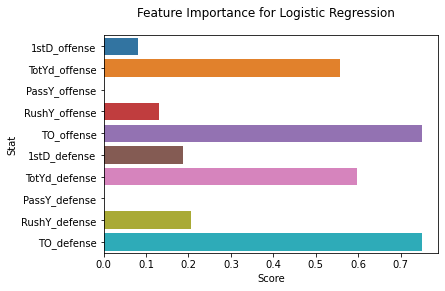

Feature: 1stD_offense, Score: 0.08
Feature: TotYd_offense, Score: 0.56
Feature: PassY_offense, Score: 0.0
Feature: RushY_offense, Score: 0.13
Feature: TO_offense, Score: 0.75
Feature: 1stD_defense, Score: 0.19
Feature: TotYd_defense, Score: 0.6
Feature: PassY_defense, Score: 0.0
Feature: RushY_defense, Score: 0.21
Feature: TO_defense, Score: 0.75


In [54]:
# get importance
importance = abs(optLr.coef_[0])

# visualize feature importance
sns.barplot(x=importance, y=features.columns)

# add labels and titles
plt.suptitle('Feature Importance for Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Stat')
plt.show()


# summarize feature importance
for i,v in enumerate(importance.round(2)):
    print(f'Feature: {features.columns[i]}, Score: {v}')

Total offense and Total defense are the two most important statistics in predicting a win.

## Conclusion

###  Try model
The team and year variables can be changed to set the team to predict and season they played.  The helper code allows the collection of the new data stats from Pro Football Reference.


In [56]:
# set team abbreviation (in capitals) and year
team = 'San Francisco 49ers'
year = 2023

# use helper function to pull new data
from helper import get_new_data
new_data = get_new_data(team=team, year=year)

# view head of new data
new_data.head()

,team_name,week,day,date,result,opponent,tm_score,opp_score,1stD_offense,TotYd_offense,PassY_offense,RushY_offense,TO_offense,1stD_defense,TotYd_defense,PassY_defense,RushY_defense,TO_defense
0,San Francisco 49ers,1,Sun,September 10,1,Pittsburgh Steelers,30,7,22,391,203,188,1,15,239,198,41,2
1,San Francisco 49ers,2,Sun,September 17,1,Los Angeles Rams,30,23,21,365,206,159,0,28,386,297,89,2
2,San Francisco 49ers,3,Thu,September 21,1,New York Giants,30,12,26,441,300,141,0,10,150,121,29,1
3,San Francisco 49ers,4,Sun,October 1,1,Arizona Cardinals,35,16,30,395,271,124,0,23,362,257,105,0
4,San Francisco 49ers,5,Sun,October 8,1,Dallas Cowboys,42,10,25,421,251,170,1,8,197,140,57,4


Before we can run the data in our model and get predictions, we need to standardize the stats using the same `scaler` we used for our original dataset.

In [57]:
# select just the game stats
new_X = new_data.loc[:,features.columns]

# standardize using original data's scaling
new_X_sc = scaler.transform(new_X)

Now we can use our model to make predictions and get an accuracy score for how well our model predicted wins with the new data.

In [58]:
# get new predictions
new_preds = optLr.predict(new_X_sc)

# get actual results and set type to float
new_results = new_data['result'].astype(float)

# get accuracy score for new data
acc_score = accuracy_score(new_results, new_preds)

Let's put all this information together in a table and print out our accuracy score.

In [59]:
# select only game data
col_names = ['day', 'date', 'result', 'opponent', 'tm_score', 'opp_score']
game_data = new_data.loc[:,col_names]
# create comparison table
comp_table = game_data.assign(predicted = new_preds,
                              actual = new_results.astype(int))

In [60]:
# print title and table
print(f'Predicted Wins vs Actual Wins for {team} in {year}')
comp_table

Predicted Wins vs Actual Wins for San Francisco 49ers in 2023


,day,date,result,opponent,tm_score,opp_score,predicted,actual
0,Sun,September 10,1,Pittsburgh Steelers,30,7,1,1
1,Sun,September 17,1,Los Angeles Rams,30,23,1,1
2,Thu,September 21,1,New York Giants,30,12,1,1
3,Sun,October 1,1,Arizona Cardinals,35,16,1,1
4,Sun,October 8,1,Dallas Cowboys,42,10,1,1
5,Sun,October 15,0,Cleveland Browns,17,19,0,0
6,Mon,October 23,0,Minnesota Vikings,17,22,0,0
7,Sun,October 29,0,Cincinnati Bengals,17,31,0,0
8,Sun,November 12,1,Jacksonville Jaguars,34,3,1,1
9,Sun,November 19,1,Tampa Bay Buccaneers,27,14,1,1


In [61]:
# print accuracy
print(f'\nCurrent Accuracy Score: ' + str(round(acc_score*100,1)) + '%')


Current Accuracy Score: 90.0%


The table gives us some context on the game, the opponent, and our prediction.